<B>CMSC641 - Fall 2017 - Final Project Part 1 - Holt</B>

<P>
<B>Do Differnces in Cryptocurrency Markets Provide Arbitrage Opportunities?</B>

<B>Research Question: </B>
Are there differences in exchange rates between the various cryptocurrency exchanges that are large enough to be
exploited through arbitrage?

Here we examine the exchange rate between Bitcoin and Ethereum at four different exchanges:  
<ul><li>Bitfinex</li><li>Bittrex</li><li>Hitbtc</li><li>Kraken</li></ul> 

Data was captured with a data collector created for this project.  The data collector program is: 
<pre>    CryptExchangeDataCollector.py
</pre>
It can be found in this directory.  See that program file for full documentation on how it works.

We start with four data files: 
    <ul>
    <li>bitfinex_ethbtc trimmed.txt</li>
    <li>bittrex_BTC-ETH trimmed.txt</li>
    <li>hitbtc_ETHBTC trimmed.txt</li>
    <li>kraken_ETHXBT trimmed.txt</li>
    </ul>
Each of these contains a time sequence of quote data for the BTC - ETH currency pair from an exchange. 

We will read these files in and extract key info:  timestamp, bid, ask. 
While reading each will build both a dict and a list for bid and ask.  
With those built, we'll be able to do some graphing and calculations to answer our research question. 


In [54]:
import yaml
from datetime import datetime

# extract timestamp, bid (as float), ask (as float) from each exchange file
# for each exchange create a list of dictionaries, one dict for each quote

bf_bid = {}  # a dict
bf_ask = {}  # a dict
bt_bid = {}  # a dict
bt_ask = {}  # a dict
hb_bid = {}  # a dict
hb_ask = {}  # a dict
kk_bid = {}  # a dict
kk_ask = {}  # a dict

bf_bid_list = []  # a list
bf_ask_list = []  # a list
bt_bid_list = []  # a list
bt_ask_list = []  # a list
hb_bid_list = []  # a list
hb_ask_list = []  # a list
kk_bid_list = []  # a list
kk_ask_list = []  # a list

bf_ts_list = []  # a list
bt_ts_list = []  # a list
hb_ts_list = []  # a list
kk_ts_list = []  # a list

bf = open("ProjectFinal/data/bitfinex_ethbtc trimmed.txt","r",encoding="latin-1")
bt = open("ProjectFinal/data/bittrex_BTC-ETH trimmed.txt","r",encoding="latin-1")
hb = open("ProjectFinal/data/hitbtc_ETHBTC trimmed.txt"  ,"r",encoding="latin-1")
kk = open("ProjectFinal/data/kraken_ETHXBT trimmed.txt"  ,"r",encoding="latin-1")

startrec = 0
stoprec = 5350
# for numeric timestamps we subtract this off to make the numbers more manageable while retaining sequence information. 
#timestampoffset = 1512370000  
line = ""

# load data from files.  The files have different formats so we have to do this separately for each file. 
#
try:
    for x in range(startrec,stoprec):  
        line = bf.readline().rstrip().lstrip()
        t, qstr = line.split(': ',1)
        ts = datetime.strptime(t, '%Y-%m-%d %H:%M:%S')
#        tsint = int(ts.timestamp()) - timestampoffset
        q = yaml.load(qstr)
#         bf_bid[tsint] = float(q["bid"])
#         bf_ask[tsint] = float(q["ask"])
        bf_bid[ts] = float(q["bid"])
        bf_ask[ts] = float(q["ask"])
        bf_bid_list.append(float(q["bid"]))
        bf_ask_list.append(float(q["ask"]))
        bf_ts_list.append(t)
        
        
    # load bt 
    for x in range(startrec,stoprec):  
        line = bt.readline().rstrip().lstrip()
        t, qstr = line.split(': ',1)
        ts = datetime.strptime(t, '%Y-%m-%d %H:%M:%S')
#        tsint = int(ts.timestamp()) - timestampoffset
        q = yaml.load(qstr)
#         bt_bid[tsint] = float(q["result"]["Bid"])
#         bt_ask[tsint] = float(q["result"]["Ask"])
        bt_bid[ts] = float(q["result"]["Bid"])
        bt_ask[ts] = float(q["result"]["Ask"])
        bt_bid_list.append(float(q["result"]["Bid"]))
        bt_ask_list.append(float(q["result"]["Ask"]))
        bt_ts_list.append(t)

    # load hb
    for x in range(startrec,stoprec):  
        line = hb.readline().rstrip().lstrip()
        t, qstr = line.split(': ',1)
        ts = datetime.strptime(t, '%Y-%m-%d %H:%M:%S')
#        tsint = int(ts.timestamp()) - timestampoffset
        q = yaml.load(qstr)
#         hb_bid[tsint] = float(q["bid"])
#         hb_ask[tsint] = float(q["ask"])
        hb_bid[ts] = float(q["bid"])
        hb_ask[ts] = float(q["ask"])
        hb_bid_list.append(float(q["bid"]))
        hb_ask_list.append(float(q["ask"]))
        hb_ts_list.append(t)

    # load kk
    for x in range(startrec,stoprec):  
        line = kk.readline().rstrip().lstrip()
        t, qstr = line.split(': ',1)
        ts = datetime.strptime(t, '%Y-%m-%d %H:%M:%S')
#        tsint = int(ts.timestamp()) - timestampoffset
        q = yaml.load(qstr)
#         kk_bid[tsint] = float(q["result"]["XETHXXBT"]["b"][0])
#         kk_ask[tsint] = float(q["result"]["XETHXXBT"]["a"][0])
        kk_bid[ts] = float(q["result"]["XETHXXBT"]["b"][0])
        kk_ask[ts] = float(q["result"]["XETHXXBT"]["a"][0])
        kk_bid_list.append(float(q["result"]["XETHXXBT"]["b"][0]))
        kk_ask_list.append(float(q["result"]["XETHXXBT"]["a"][0]))
        kk_ts_list.append(t)

except:
    print('in except - caught exception during file reads.  current line: ')
    print(line)
    
    # close all open files
    bf.close()
    bt.close()
    hb.close()
    kk.close()

    raise
    
    
bf.close()
bt.close()
hb.close()
kk.close()

#len(bitfinex)
#print(bitfinex[1]["timestamp"] + " " + bitfinex[1]["bid"] + " " + bitfinex[1]["ask"])
#print(bitfinex[1]["bid"] + " " + bitfinex[1]["ask"])
print(bf_bid)
#print(bt_bid)
#print(hb_bid)
#print(kk_bid)
#dt = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')




{datetime.datetime(2017, 12, 4, 1, 52, 48): 0.040674, datetime.datetime(2017, 12, 4, 1, 54, 4): 0.040711, datetime.datetime(2017, 12, 4, 1, 55, 6): 0.040724, datetime.datetime(2017, 12, 4, 1, 56, 2): 0.040715, datetime.datetime(2017, 12, 4, 1, 56, 57): 0.040701, datetime.datetime(2017, 12, 4, 1, 58, 37): 0.0407, datetime.datetime(2017, 12, 4, 1, 59, 30): 0.040674, datetime.datetime(2017, 12, 4, 2, 0, 24): 0.040655, datetime.datetime(2017, 12, 4, 2, 1, 21): 0.040635, datetime.datetime(2017, 12, 4, 2, 2, 16): 0.040651, datetime.datetime(2017, 12, 4, 2, 3, 10): 0.040644, datetime.datetime(2017, 12, 4, 2, 4, 5): 0.040688, datetime.datetime(2017, 12, 4, 2, 5): 0.040699, datetime.datetime(2017, 12, 4, 2, 5, 55): 0.040707, datetime.datetime(2017, 12, 4, 2, 7, 21): 0.040707, datetime.datetime(2017, 12, 4, 2, 8, 16): 0.04071, datetime.datetime(2017, 12, 4, 2, 9, 25): 0.04071, datetime.datetime(2017, 12, 4, 2, 10, 20): 0.040719, datetime.datetime(2017, 12, 4, 2, 11, 15): 0.04069, datetime.dateti

We also want to have the data as pandas data frames.  We will create those here. 

In [55]:
import pandas
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy

bf_bid_df = pandas.DataFrame.from_records({"bf_bid":bf_bid})
bf_ask_df = pandas.DataFrame.from_records({"bf_ask":bf_ask})
bt_bid_df = pandas.DataFrame.from_records({"bt_bid":bt_bid})
bt_ask_df = pandas.DataFrame.from_records({"bt_ask":bt_ask})
hb_bid_df = pandas.DataFrame.from_records({"hb_bid":hb_bid})
hb_ask_df = pandas.DataFrame.from_records({"hb_ask":hb_ask})
kk_bid_df = pandas.DataFrame.from_records({"kk_bid":kk_bid})
kk_ask_df = pandas.DataFrame.from_records({"kk_ask":kk_ask})

# print(bf_bid_df)
# print(bt_bid_df)
# print(hb_bid_df)
# print(kk_bid_df)

# print(bf_bid_df.dtypes)
# print(bt_bid_df.dtypes)
# print(hb_bid_df.dtypes)
# print(kk_bid_df.dtypes)

Now we have the data loaded, in dict, list and dataframe representations.  
We can create some charts to visualize it. 

In [87]:
# setting some plotting params and making a function to make plotting easier
# throughout this we will plot bids in blue and asks in red

from pylab import rcParams
#rcParams['figure.figsize'] = 15, 10
rcParams['figure.figsize'] = 14, 8

def plotall():
    
    plt.plot(bf_bid_df, color='Blue')
    plt.plot(bt_bid_df, color='DeepSkyBlue')
    plt.plot(hb_bid_df, color='SteelBlue')
    plt.plot(kk_bid_df, color='DarkBlue')

    plt.plot(bf_ask_df, color='OrangeRed')
    plt.plot(bt_ask_df, color='Red')
    plt.plot(hb_ask_df, color='DarkRed')
    plt.plot(kk_ask_df, color='Crimson')
    
    plt.show()


In [88]:
# this will chart the whole data set, about six days of bid/ask data from our four exhanges

plt.clf() # clear any previously plotted stuff from the plot
plt.xlim(pandas.Timestamp('2017-12-04 02:00:00'), pandas.Timestamp('2017-12-09 12:00:00'))
plt.ylim([0.0230,0.0420])
plotall()

This shows the general exchange rate trend over our time period, but isn't very helpful for our main question: what is the difference in exchange rates?
To see data relevant to that we need to zoom in closer. 

In [106]:
# Here we zoom in to a two hour time period. 

plt.clf()
plt.xlim(pandas.Timestamp('2017-12-09 04:00:00'), pandas.Timestamp('2017-12-09 06:00:00'))
plt.ylim([0.0319,0.03285])
plotall()

Anywhere a blue line is higher than a red line means a bid on some exchange is higher than an ask on another exchange. And that means there is arbitrage opportunity. If these occurred on the same exchange the exchange would immediately match them up and execute the trade, so anywhere we see them here they are on different exchanges.

Perhaps an example will help to illustrate this point.  Suppose there are two markets, market A and market B. In both markets participants can buy and sell widgets for dollars.  Suppose that we encounter a situation where someone is offering widgets for sale in A for \$100, and someone is offering to buy widgets in B for \$110.  We could buy a widget 
in A for \$100, sell it in B for \$110, and make \$10 in profit.  If we can repeat this process quickly we can make \$10 for every transaction we are able to execute while this condition exists.  This is called arbitrage. 

There are some additional subtleties.  In the above example, the price could change between us buying the widget and selling it, ruining our deal.  To eliminate this risk, we try to execute the two transactions simultaneously.  But to do them simultaneously we must have some dollars ready to spend in market A and some widgets ready to sell in market B. Also, there may be transaction fees which decrease our profit.  If A and B both have a \$6 transaction fee, we would end up paying \$12 in fees to buy and sell, which would mean in the end we lost \$2 rather than making a profit. But then, if those fees are per-transaction and we can do transactions of 100 widgets we might again be profitable. 

All of these factors have to be taken into account to determine if an arbitrage transaction is profitable.  We won't have time to build all of those into our model, but we can identify some times when arbitrage might have been possible and measure the gross potential gain before fees and the frequency of these conditions occurring. 

In [90]:
# here we zoom in on the large hump area from our previous chart

plt.clf()
plt.xlim(pandas.Timestamp('2017-12-09 04:40:00'), pandas.Timestamp('2017-12-09 04:50:00'))
plt.ylim([0.0322,0.0329])
plotall()

We can see that the higest blue line is about 0.0004 higer than the lowest red line.  This is the arbitrage gap we are interested in. 

In [100]:
# here is another time slice of interest, where markets were out of sync. 
# this shows several of the largest spreads that occurred during our five day sample
plt.clf()
plt.xlim(pandas.Timestamp('2017-12-08 13:55:00'), pandas.Timestamp('2017-12-08 15:05:00'))
plt.ylim([0.0255,0.0310])
plotall()


At about 13:57 we can see the highest blue is around 0.030 and the lowest red is around 0.0262, a difference of 0.0038.  

What does that equate to in real dollars?

At the time of that quote Bitcoin was trading at about \$15500.  

If we started with \$100,000 worth of Bitcoin, that would be 6.4516 BTC.
At the lowest red line 1 ETH was selling for 0.0262 BTC.  With our 6.4516 BTC we could buy 246.244 ETH. 
At the highest blue line 0.030 BTC was offered for 1 ETH.  We could sell our 246.244 ETH for 7.3873 BTC. 
That 7.3873 BTC would be worth \$114503.  

<b>Our potential profit, before fees, is \$14,503, or 14.5%.  </b>

A reasonable followup question is: how often does this happen, and to what degree?

Let's compute this trade-able spread for all the times in our five day sample. We will set it to zero any time there is no bid higher than an ask. 

We can also find out how often it is above zero, and what the average spread is. 

In [107]:
startrec = 0
stoprec = 5000

spreads = {}

# for each timestep commpute: 
#    Highest bid, lowest ask, spread
# and save timestamp: spread into a dict for plotting
# Round timestamps off to nearest minute
for x in range(startrec,stoprec):  
    dates  = [bf_ts_list[x] ,bt_ts_list[x] ,hb_ts_list[x] ,kk_ts_list[x] ]
    bids   = [bf_bid_list[x],bt_bid_list[x],hb_bid_list[x],kk_bid_list[x]]
    asks   = [bf_ask_list[x],bt_ask_list[x],hb_ask_list[x],kk_ask_list[x]]
    maxbid = max(bids)
    minask = min(asks)
    spread =  maxbid - minask
    
    d = dates[0][:16]+":00"
    ts = datetime.strptime(d, '%Y-%m-%d %H:%M:%S')
    if spread < 0:
        spreads[ts]=0.0
    else:
        spreads[ts]=spread

    # print the largest few spreads
    if spread > 0.004:
        print(d + " " + str(spread) + " " + str(maxbid) + " " + str(minask))
        
#     print(dates)
#     print(bids)
#     print(asks)
#     print("max bid: "+str(maxbid))
#     print("min ask: "+str(minask))
#     print("spread: "+format(spread,'.8f'))
#     print("\n")
    

2017-12-08 13:58:00 0.004171999999999999 0.03033 0.026158
2017-12-08 14:01:00 0.004032000000000001 0.03019 0.026158
2017-12-08 14:04:00 0.004091999999999998 0.03025 0.026158
2017-12-08 14:10:00 0.0041833600000000006 0.03034136 0.026158
2017-12-08 14:11:00 0.004336449999999999 0.03049445 0.026158
2017-12-08 14:47:00 0.004240000000000001 0.030398 0.026158
2017-12-08 14:49:00 0.004215 0.030373 0.026158
2017-12-08 14:54:00 0.004342800000000001 0.0305008 0.026158
2017-12-08 14:59:00 0.004285999999999998 0.030444 0.026158
2017-12-08 15:02:00 0.004153999999999998 0.030312 0.026158


During our period, the largest spread was: 0.0043428
occurring at 2017-12-08 14:54:00 with a max bid of 0.0305008 and a max ask of 0.026158

If we repeat our exercise from above, \$100,000 of BTC, after buying and selling, would yield \$116,960, before fees. 


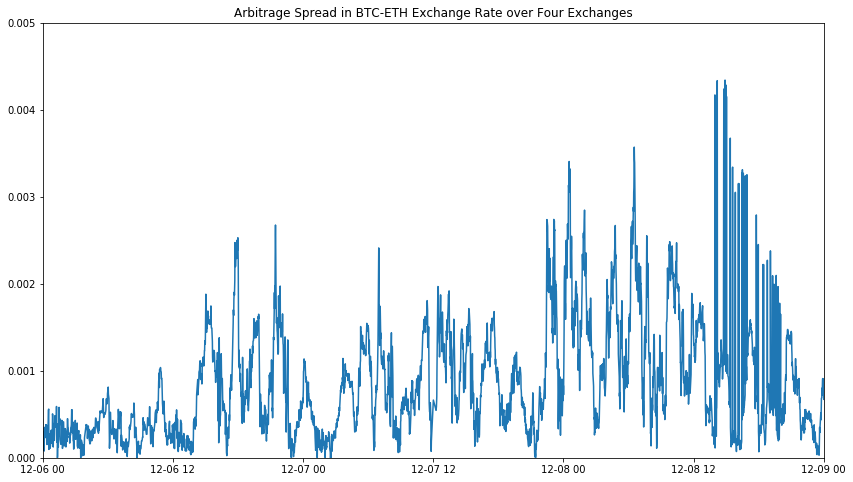

In [105]:
# here we plot spread over time for the whole sample period

sp_df = pandas.DataFrame.from_records({"sp":spreads})

plt.clf()
plt.title('Arbitrage Spread in BTC-ETH Exchange Rate over Four Exchanges')
plt.xlim(pandas.Timestamp('2017-12-06'), pandas.Timestamp('2017-12-09'))
plt.ylim([0.0,0.005])
plt.plot(sp_df)
plt.show()


In [132]:
# Here we count how many time steps have a spread vs. how many do not
# and we compute the average spread

# count   = sp_df['sp'].count()
# zero    = len( sp_df[(sp_df['sp']==0)] )
# nonzero = len( sp_df[(sp_df['sp'] >0)] )

print('spread count    : '+str(sp_df['sp'].count()) )
print('zero spreads    : '+str( len( sp_df[(sp_df['sp']==0)] ) ) )
print('nonzero spreads : '+str( len( sp_df[(sp_df['sp'] >0)] ) ) )

print('spread mean              : '+str( sp_df.mean(axis=0)[0]) )
print('spread standard deviation: '+str( sp_df.std(axis=0)[0]) )

spread count    : 4866
zero spreads    : 57
nonzero spreads : 4809
spread mean              : 0.000740308633374
spread standard deviation: 0.00065724144355


So we can see that most of the time some spread exists.  The average spread over the whole period was 0.00074, which equates to about 2.6% of the average price. 

<b>Here is the answer to our research question: </b>
    
It appears that some level of spread occurs frequently in these markets. And large, arbitrage eligible levels of spread occur with some regularity, with several examples in our relatively small five day sample. 